In [ ]:
#import stuffs
import numpy as np
import pandas as pd
!pip install pingouin
from pingouin import ancova
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
#Connect to my Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Display first five columns of data
A3_data = pd.read_csv('/content/drive/MyDrive/INF 2178/INF2178_A3_data.csv') #load the data, except the explanation sheet
A3_data.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


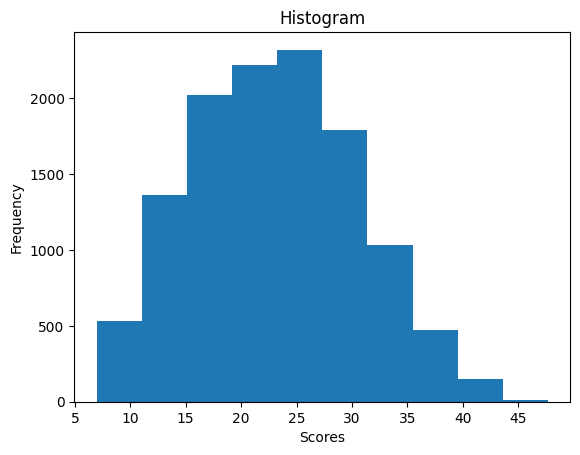

In [ ]:
plt.hist(A3_data['fallgeneralknowledgescore'], bins=10)  #Display a historgram to show the distribution of fall general knowledge score
plt.title('Histogram')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Calculating the improvements on different score and create the new variable
A3_data['mathscorediff'] = A3_data['springmathscore'] - A3_data['fallmathscore']
A3_data['generaldiff'] = A3_data['springgeneralknowledgescore'] - A3_data['fallgeneralknowledgescore']
A3_data['readingdiff'] = A3_data['springreadingscore'] - A3_data['fallreadingscore']
# Define the conditions for the different score levels
conditions = [
    (A3_data['fallgeneralknowledgescore'] >= 35),
    (A3_data['fallgeneralknowledgescore'] >= 25) & (A3_data['fallgeneralknowledgescore'] < 35),
    (A3_data['fallgeneralknowledgescore'] >= 15) & (A3_data['fallgeneralknowledgescore'] < 25),
    (A3_data['fallgeneralknowledgescore'] < 15)
]

# Define the corresponding score levels
score_levels = ['A', 'B', 'C', 'D']

# Use np.select to apply these conditions and levels
A3_data['fallscorelevel'] = np.select(conditions, score_levels)

# Display the first few rows to verify new columns
A3_data.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup,mathscorediff,generaldiff,readingdiff,fallscorelevel
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3,10.56,6.711,12.79,B
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3,14.49,-0.738,32.68,A
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3,4.24,1.204,-0.27,B
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2,11.68,11.978,1.57,C
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2,3.95,8.250,0.86,C


**#1 ANCOVA: Explore relationship of math scores between two semester**

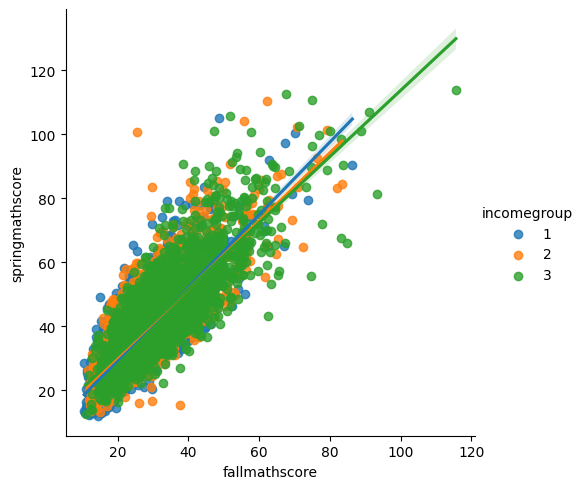

In [ ]:
# Check Assumption #1: There is a linear relationship between dependent variable and covriants and homogenity of slopes assumptions
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x = 'fallmathscore', y = 'springmathscore', hue = 'incomegroup', data = A3_data)
plt.show()

In [ ]:
#Conducting the ANCOVA analysis, setting depending variable as spring math score, and covariants as fall math score and independent variabl as income group
ancova(data = A3_data, dv = 'springmathscore', covar = 'fallmathscore', between = 'incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,1.712758e+03,2,18.523585,9.284861e-09,0.003096
1,fallmathscore,1.026489e+06,1,22203.081238,0.000000e+00,0.650505
2,Residual,5.514994e+05,11929,NaN,NaN,NaN


**#2 ANCOVA: How the level of FallGeneralKnowledgesScore will affect the spring general knowledge score while controlling 3 different scores in fall**

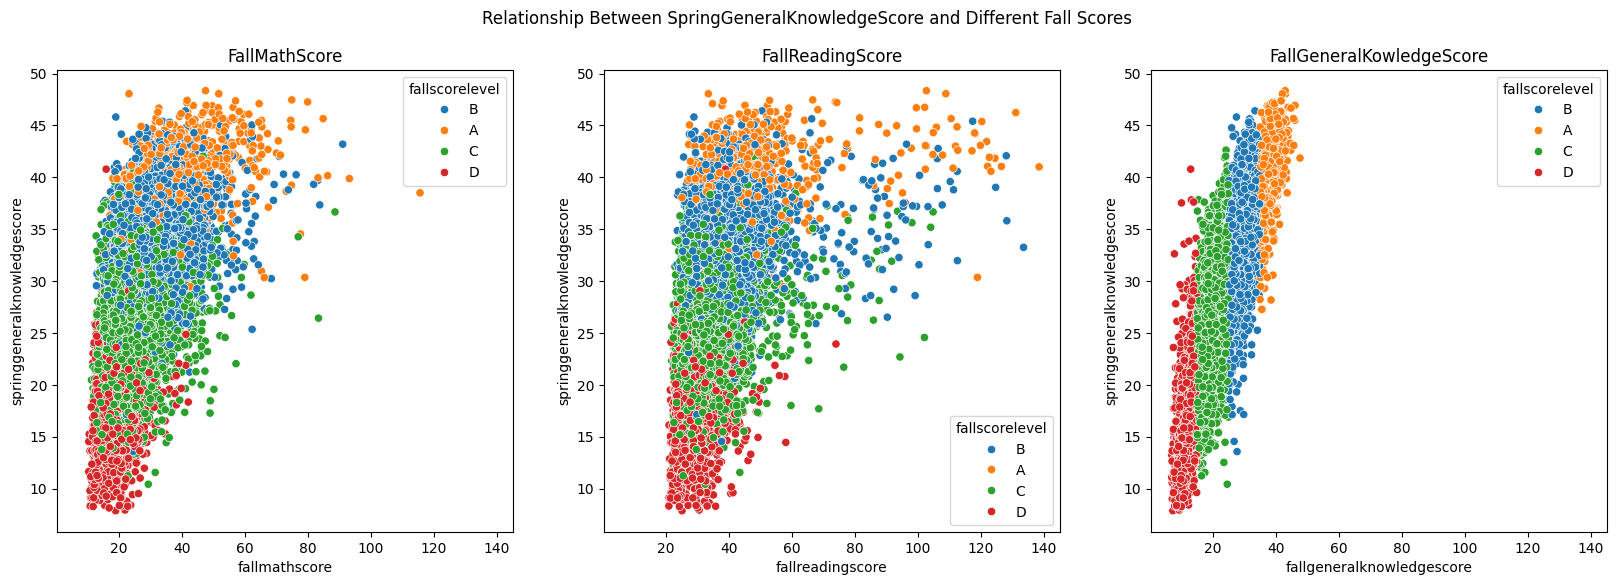

In [ ]:
#Check ANCOVA Assumptions of linear relationship and homogenity of slopes assumptions
fig, ax = plt.subplots(nrows = 1, ncols = 3, sharex = True, figsize = (20, 6))


ax[0].set_title('FallMathScore') #this plot will be set in position 0
sns.scatterplot(x = 'fallmathscore', y = 'springgeneralknowledgescore', hue = 'fallscorelevel', data = A3_data, ax = ax[0])

ax[1].set_title('FallReadingScore') #this plot will be set in position 1
sns.scatterplot(x = 'fallreadingscore', y = 'springgeneralknowledgescore', hue = 'fallscorelevel', data = A3_data, ax = ax[1])

ax[2].set_title('FallGeneralKowledgeScore')#this plot will be set in position 2
sns.scatterplot(x = 'fallgeneralknowledgescore', y = 'springgeneralknowledgescore', hue = 'fallscorelevel', data = A3_data, ax = ax[2])

fig.suptitle('Relationship Between SpringGeneralKnowledgeScore and Different Fall Scores') #the main title
plt.show()

In [ ]:
#Using Statsmodel to fit ANCOVA model
model = sm.formula.ols('springgeneralknowledgescore ~ fallscorelevel + fallmathscore + fallreadingscore', data = A3_data).fit()

#Print model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     springgeneralknowledgescore   R-squared:                       0.666
Model:                                     OLS   Adj. R-squared:                  0.666
Method:                          Least Squares   F-statistic:                     4754.
Date:                         Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                                 14:39:57   Log-Likelihood:                -34557.
No. Observations:                        11933   AIC:                         6.913e+04
Df Residuals:                            11927   BIC:                         6.917e+04
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [ ]:
#Using Statsmodel to fit ANCOVA model
model = sm.formula.ols('springgeneralknowledgescore ~ fallscorelevel * fallmathscore + fallreadingscore', data = A3_data).fit()

#Print model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     springgeneralknowledgescore   R-squared:                       0.669
Model:                                     OLS   Adj. R-squared:                  0.669
Method:                          Least Squares   F-statistic:                     3011.
Date:                         Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                                 14:40:21   Log-Likelihood:                -34503.
No. Observations:                        11933   AIC:                         6.902e+04
Df Residuals:                            11924   BIC:                         6.909e+04
Df Model:                                    8                                         
Covariance Type:                     nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

**How the level of fall general knowledge score will affect the improvements on the score of general knowledge while controlling the improvements on math score
**

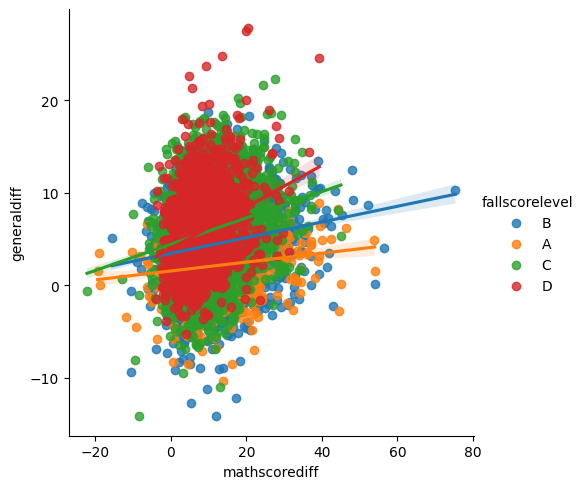

In [ ]:
##Check ANCOVA Assumptions of linear relationship and homogenity of slopes assumptions
sns.lmplot(x = 'mathscorediff', y = 'generaldiff', data = A3_data, hue = 'fallscorelevel')
plt.show()

In [ ]:
#Using Statsmodel to fit ANCOVA model
model = sm.formula.ols('generaldiff ~ fallscorelevel + mathscorediff', data = A3_data).fit()

#Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            generaldiff   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     322.7
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          4.30e-264
Time:                        14:41:09   Log-Likelihood:                -33024.
No. Observations:               11933   AIC:                         6.606e+04
Df Residuals:                   11928   BIC:                         6.609e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6732    